In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
import os

df = pd.read_csv('Data/Dataset-Mental-Disorders.csv')

In [2]:
# Data is retrieved from https://www.kaggle.com/datasets/cid007/mental-disorder-classification
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [3]:
df.shape

(120, 19)

In [4]:
df.dtypes

Patient Number         object
Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Mood Swing             object
Suicidal thoughts      object
Anorxia                object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Sexual Activity        object
Concentration          object
Optimisim              object
Expert Diagnose        object
dtype: object

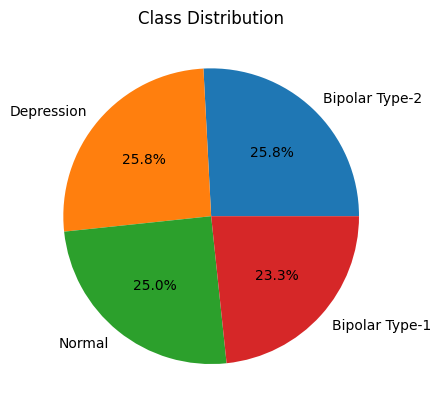

In [5]:
class_counts = df['Expert Diagnose'].value_counts()
class_labels = class_counts.index
class_percentages = class_counts / class_counts.sum() * 100

plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


In [6]:
# Find the unique values for each column
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Patient Number: ['Patiant-01' 'Patiant-02' 'Patiant-03' 'Patiant-04' 'Patiant-05'
 'Patiant-06' 'Patiant-07' 'Patiant-08' 'Patiant-09' 'Patiant-10'
 'Patiant-11' 'Patiant-12' 'Patiant-13' 'Patiant-14' 'Patiant-15'
 'Patiant-16' 'Patiant-17' 'Patiant-18' 'Patiant-19' 'Patiant-20'
 'Patiant-21' 'Patiant-22' 'Patiant-23' 'Patiant-24' 'Patiant-25'
 'Patiant-26' 'Patiant-27' 'Patiant-28' 'Patiant-29' 'Patiant-30'
 'Patiant-31' 'Patiant-32' 'Patiant-33' 'Patiant-34' 'Patiant-35'
 'Patiant-36' 'Patiant-37' 'Patiant-38' 'Patiant-39' 'Patiant-40'
 'Patiant-41' 'Patiant-42' 'Patiant-43' 'Patiant-44' 'Patiant-45'
 'Patiant-46' 'Patiant-47' 'Patiant-48' 'Patiant-49' 'Patiant-50'
 'Patiant-51' 'Patiant-52' 'Patiant-53' 'Patiant-54' 'Patiant-55'
 'Patiant-56' 'Patiant-57' 'Patiant-58' 'Patiant-59' 'Patiant-60'
 'Patiant-61' 'Patiant-62' 'Patiant-63' 'Patiant-64' 'Patiant-65'
 'Patiant-66' 'Patiant-67' 'Patiant-68' 'Patiant-69' 'Patiant-70'
 'Patiant-71' 'Patiant-72' 'Patiant-73' 'Patiant-74' 'Patian

In [7]:
# Preprocess the data by turning unstandardized response to fixed format for data analysis
df.replace({'Seldom': 1, 'Sometimes': 2, 'Usually': 3, 'Most-Often': 4,
            'NO': 0, 'YES': 1, 'YES ': 1,
            '1 out of 10': 1, '2 out of 10': 2, '3 out of 10': 3, '4 out of 10': 4, '5 out of 10': 5, '6 out of 10': 6, '7 out of 10': 7, '8 out of 10': 8, '9 out of 10': 9, '10 out of 10': 10,
            '1 From 10': 1, '2 From 10': 2, '3 From 10': 3, '4 From 10': 4, '5 From 10': 5, '6 From 10': 6, '7 From 10': 7, '8 From 10': 8, '9 From 10': 9, '10 From 10': 10,
            'Normal': 0, 'Bipolar Type-1': 1, 'Bipolar Type-2': 2, 'Depression': 3}, inplace=True)

for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Patient Number: ['Patiant-01' 'Patiant-02' 'Patiant-03' 'Patiant-04' 'Patiant-05'
 'Patiant-06' 'Patiant-07' 'Patiant-08' 'Patiant-09' 'Patiant-10'
 'Patiant-11' 'Patiant-12' 'Patiant-13' 'Patiant-14' 'Patiant-15'
 'Patiant-16' 'Patiant-17' 'Patiant-18' 'Patiant-19' 'Patiant-20'
 'Patiant-21' 'Patiant-22' 'Patiant-23' 'Patiant-24' 'Patiant-25'
 'Patiant-26' 'Patiant-27' 'Patiant-28' 'Patiant-29' 'Patiant-30'
 'Patiant-31' 'Patiant-32' 'Patiant-33' 'Patiant-34' 'Patiant-35'
 'Patiant-36' 'Patiant-37' 'Patiant-38' 'Patiant-39' 'Patiant-40'
 'Patiant-41' 'Patiant-42' 'Patiant-43' 'Patiant-44' 'Patiant-45'
 'Patiant-46' 'Patiant-47' 'Patiant-48' 'Patiant-49' 'Patiant-50'
 'Patiant-51' 'Patiant-52' 'Patiant-53' 'Patiant-54' 'Patiant-55'
 'Patiant-56' 'Patiant-57' 'Patiant-58' 'Patiant-59' 'Patiant-60'
 'Patiant-61' 'Patiant-62' 'Patiant-63' 'Patiant-64' 'Patiant-65'
 'Patiant-66' 'Patiant-67' 'Patiant-68' 'Patiant-69' 'Patiant-70'
 'Patiant-71' 'Patiant-72' 'Patiant-73' 'Patiant-74' 'Patian

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim'],
      dtype='object')


F1 score of Logistic Regression: 0.8593020541549953
F1 score of Random Forest: 0.9209001782531194
F1 score of Naive Bayes: 0.6777777777777778
F1 score of XGBoost: 0.8102941176470588
F1 score of Multi-Layer Perceptron: 0.8593020541549953

Details of the best model: Random Forest

Random Forest:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.71      0.83         7
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         4

    accuracy                           0.92        24
   macro avg       0.93      0.93      0.92        24
weighted avg       0.93      0.92      0.91        24




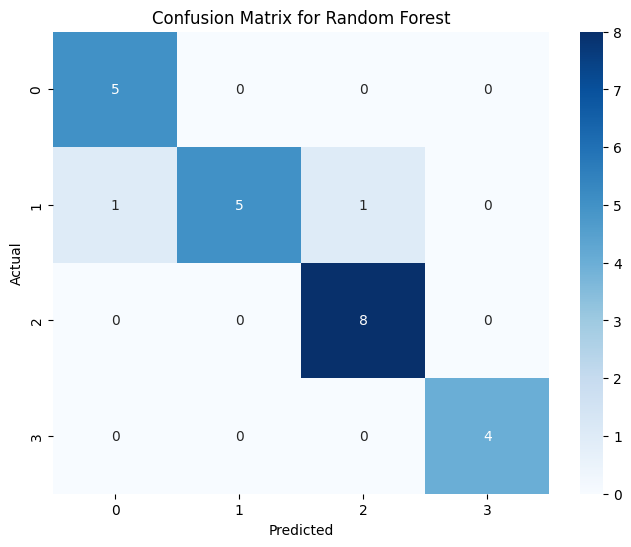

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import seaborn as sns

X = df.drop(['Expert Diagnose', 'Patient Number'] , axis=1)
Y = df['Expert Diagnose']
print(X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

# Standardize the data
scaler = StandardScaler()
non_cat_columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Sexual Activity', 'Concentration','Optimisim']
scaler.fit(X_train[non_cat_columns])
X_train[non_cat_columns] = scaler.transform(X_train[non_cat_columns])
X_test[non_cat_columns] = scaler.transform(X_test[non_cat_columns])

# Train the models and compare their performances
models = [LogisticRegression(), RandomForestClassifier(max_depth=4, random_state=0), GaussianNB(), xgb.XGBClassifier(max_depth=3,learning_rate=0.05, reg_alpha=0.05), MLPClassifier(random_state=0, max_iter=600)]
model_name = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'XGBoost', 'Multi-Layer Perceptron']

f1_scores = []
confusion_matricies = []
Y_preds = []
for i, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    Y_preds.append(Y_pred)

    f1_scores.append(f1_score(Y_test, Y_pred, average='macro'))

    cm = confusion_matrix(Y_test, Y_pred)
    confusion_matricies.append(cm)

for i in range(len(models)):
    print(f"F1 score of {model_name[i]}: {f1_scores[i]}")

index_of_best_model = f1_scores.index(max(f1_scores))

print(f"\nDetails of the best model: {model_name[index_of_best_model]}\n")
print(f"{model_name[index_of_best_model]}:\n{classification_report(Y_test, Y_preds[index_of_best_model])}\n")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matricies[index_of_best_model], annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {model_name[index_of_best_model]}')
plt.show()